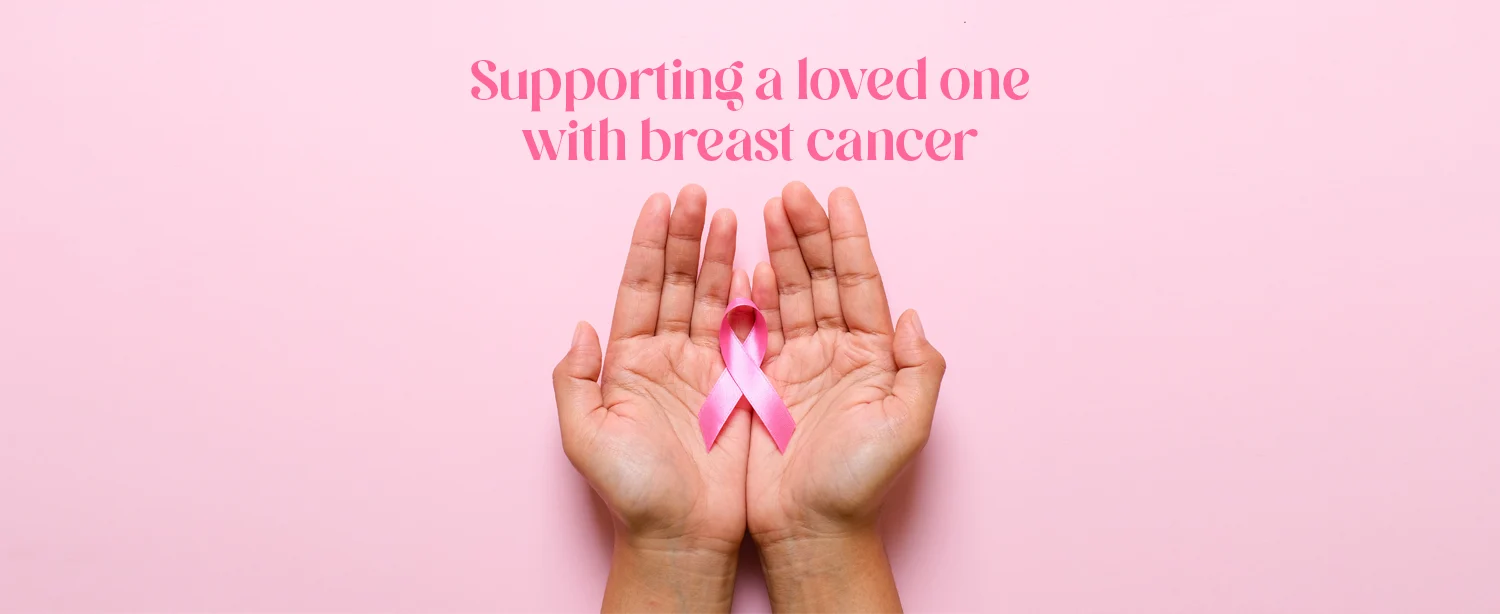

# Breast cancer 
Breast Cancer remains one of the most prevalent and concerning health issues globally, affecting millions of lives each year. Early detection and accurate diagnosis play pivotal roles in improving patient outcomes and survival rates. In the quest for more effective diagnostic tools, advancements in machine learning and data analysis techniques offer promising avenues for enhancing our understanding of breast cancer patterns and characteristics.

The Breast Cancer Wisconsin (Diagnostic) dataset provides a rich resource for studying breast cancer diagnosis. Comprising features extracted from digitized images of fine needle aspirates (FNAs) of breast masses, this dataset offers insights into various cellular characteristics that contribute to the diagnosis of malignancy or benignity. Each instance in the dataset is labeled with the diagnosis obtained from biopsies, distinguishing between malignant (M) and benign (B) cases.

In this project, I embark on a journey to explore the Breast Cancer Wisconsin dataset using Principal Component Analysis (PCA), a powerful dimensionality reduction technique widely employed in data analysis and visualization tasks. By leveraging PCA, my aim is to unravel the underlying structure of the breast cancer data, identify significant patterns, and visualize the complex relationships between the extracted features and diagnostic outcomes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# **Data Exploration**

In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
df.shape

(569, 33)

# **Data Preprocessing**

In [7]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['diagnosis'], dtype='object')

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# drop unnamed
df = df.drop("Unnamed: 32",axis=1)
df=df.drop("id",axis=1)

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **visualization**

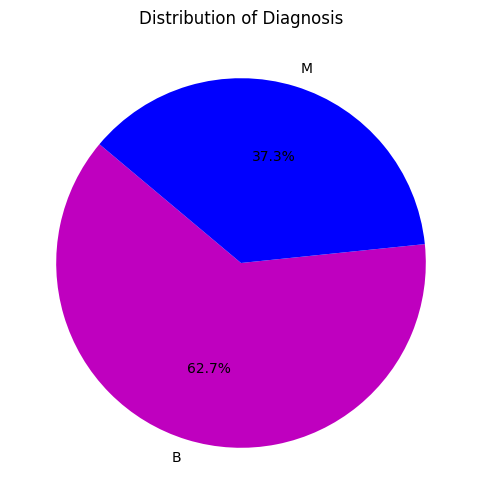

In [12]:
# distributionof diagnosis
x= df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=['m', 'b'])
plt.title('Distribution of Diagnosis')
plt.show()

In [13]:
# Features
X = df.drop(columns=['diagnosis'])  # Exclude the diagnosis column
# Target variable (diagnosis)
y = df['diagnosis']

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components to retain--could be two or three---depends
X_pca = pca.fit_transform(X_scaled)

In [16]:
# Create DataFrame with the correct number of components
df_pca = pd.DataFrame({"PC": ["PC" + str(i) for i in range(1, pca.n_components_ + 1)],
                       "var": np.cumsum(pca.explained_variance_ratio_)})
df_pca

,PC,var
0,PC1,0.442720
1,PC2,0.632432


In [17]:
# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y  # Add the diagnosis labels

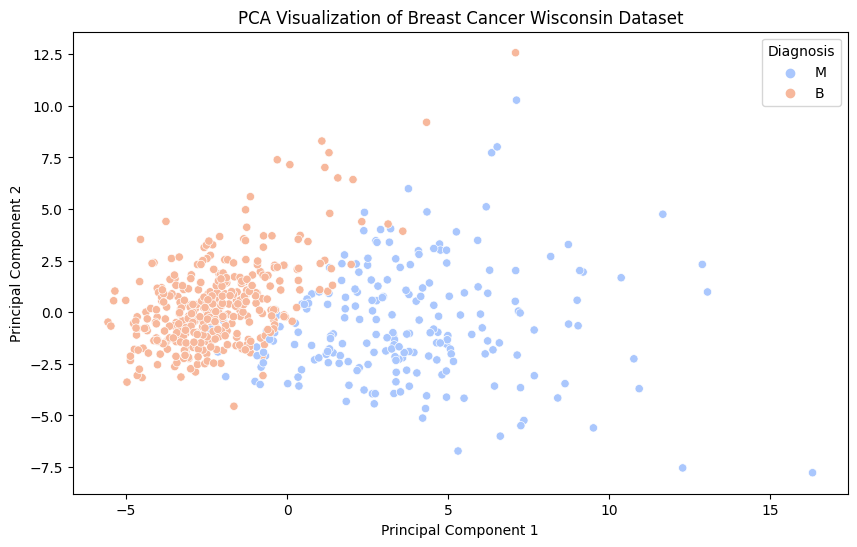

In [18]:
# Visualization of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['diagnosis'], palette='coolwarm')
plt.title('PCA Visualization of Breast Cancer Wisconsin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

In [19]:
# Determine the number of components returned by PCA
n_components = pca.n_components_
n_components

2

In [20]:
categories = df['diagnosis'].value_counts()
print(categories)

diagnosis
B    357
M    212
Name: count, dtype: int64


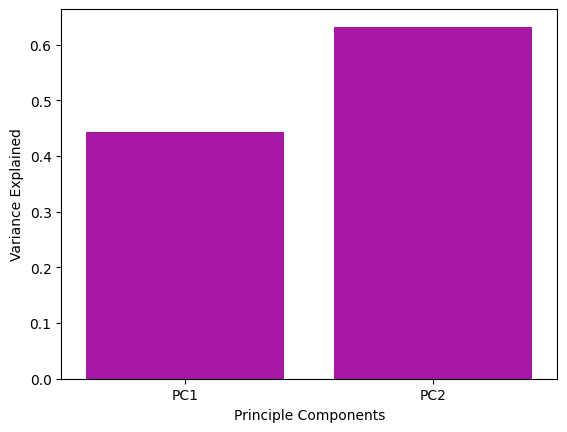

In [21]:
# visualization of PCA
sns.barplot(x="PC",y="var",data=df_pca,color="m")
plt.ylabel("Variance Explained")
plt.xlabel("Principle Components")
plt.show()

In [22]:
# 'M' and 'B' are the only categories in the diagnosis column
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [23]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.44272026 0.18971182]


In [24]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.44272026 0.63243208]


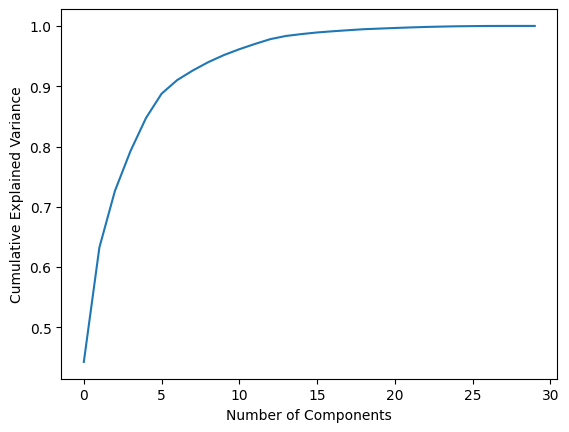

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
pca_fit = pca.transform(X_scaled)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [26]:
#  after printing the explained variance ratio for each principal component and calculating the cumulative explained variance, a new PCA transformation is applied with n_components=3. 
# This step is to explore the potential benefit of using three principal components instead of just two.
# Define PCA with 3 components
pca = PCA(n_components=3)

# Fit and transform the standardized data
X_pca = pca.fit_transform(X_scaled)

Although the initial analysis was done with two principal components for visualization purposes, it's common to further investigate the data by exploring additional principal components. The choice of the number of components ultimately depends on the specific requirements of your analysis and the amount of variance you want to capture.

By plotting the explained variance ratio for different numbers of components and observing an "elbow" in the plot, you can determine an appropriate number of components to retain. In this case, seeing an elbow at three components suggests that including three principal components may capture a significant amount of additional variance in the data compared to using just two components.

Therefore, the subsequent PCA transformation with n_components=3 allows you to explore the data further and potentially capture more information for your analysis.

In [30]:
# Create DataFrame with the correct number of components
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Add the 'diagnosis' column to the DataFrame
pca_df['diagnosis'] = df['diagnosis']

# Display the first few rows of the PCA-transformed numerical columns with the 'diagnosis' column
print("PCA-transformed numerical columns with diagnosis: ")
print(pca_df.head(15))

PCA-transformed numerical columns with diagnosis: 
         PC1        PC2       PC3 diagnosis
0   9.192837   1.948581 -1.123132         M
1   2.387802  -3.768173 -0.529280         M
2   5.733896  -1.075174 -0.551745         M
3   7.122953  10.275589 -3.232785         M
4   3.935302  -1.948072  1.389765         M
5   2.380247   3.949929 -2.934878         M
6   2.238883  -2.690031 -1.639914         M
7   2.143298   2.340243 -0.871931         M
8   3.174924   3.391814 -3.119995         M
9   6.351747   7.727171 -4.341880         M
10 -0.810414  -2.659275 -0.488837         M
11  2.651100   0.066565 -1.526420         M
12  8.185034   2.700973  5.730279         M
13  0.342126  -0.968279  1.717171         M
14  4.342379   4.861082 -2.816097         M


In [28]:
# Before PCA
print("Shape of original data:", X_scaled.shape)

Shape of original data: (569, 30)


In [29]:
# After PCA
print("Shape of PCA-transformed data:", X_pca.shape)

Shape of PCA-transformed data: (569, 3)


Reducing the dimensionality from 30 features to 3 principal components is a substantial reduction. It means that the original 30-dimensional feature space has been effectively represented by a lower-dimensional space spanned by these 3 principal components.

> once you've reduced the dimensionality of your data using PCA, you may want to use the reduced dataset for supervised learning tasks such as classification or regression.